<a href="https://colab.research.google.com/github/Deleolowo/Assignment/blob/main/Project_1_Data_Collection_and_Initial_Analysis_of_Stock_Market_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA: Daily Historical Stock Prices (1970 - 2020)
#
# This notebook/script walks through the assignment steps:
# - load datasets
# - clean data (missing values, duplicates, dtypes)
# - create decade segmentation
# - merge with stock metadata (sector info)
# - compute summary statistics per decade
# - produce visualizations per decade
# - export results and save summary
#
# Instructions: put 'historical_stocks.csv' and 'historical_stock_prices.csv' in the same
# directory as this script/notebook and run all cells.

In [ ]:
# ============================================================
# 1) SETUP
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

plt.style.use("seaborn-v0_8")

In [ ]:
import pandas as pd

# upload data file
prices = pd.read_csv("historical_stock_prices.csv", parse_dates=["date"])
stocks = pd.read_csv("historical_stocks.csv")

print(prices.head())
print(stocks.head())

  ticker   open  close  adj_close    low   high     volume       date
0    AHH  11.50  11.58   8.493155  11.25  11.68  4633900.0 2013-05-08
1    AHH  11.66  11.55   8.471151  11.50  11.66   275800.0 2013-05-09
2    AHH  11.55  11.60   8.507822  11.50  11.60   277100.0 2013-05-10
3    AHH  11.63  11.65   8.544494  11.55  11.65   147400.0 2013-05-13
4    AHH  11.60  11.53   8.456484  11.50  11.60   184100.0 2013-05-14
  ticker exchange                                    name             sector  \
0    PIH   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.            FINANCE   
1  PIHPP   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.            FINANCE   
2   TURN   NASDAQ                180 DEGREE CAPITAL CORP.            FINANCE   
3   FLWS   NASDAQ                 1-800 FLOWERS.COM, INC.  CONSUMER SERVICES   
4   FCCY   NASDAQ           1ST CONSTITUTION BANCORP (NJ)            FINANCE   

                     industry  
0  PROPERTY-CASUALTY INSURERS  
1  PROPERTY-CASUALTY INSURERS  
2  

In [ ]:
# ============================================================
# 4) DATA CLEANING
# ============================================================

# Handle missing values
stocks = stocks.dropna().copy()
prices = prices.dropna(subset=["open", "high", "low", "close", "volume"]).copy()

# Remove duplicates
stocks.drop_duplicates(inplace=True)
prices.drop_duplicates(inplace=True)

# Ensure date is datetime + set index
prices["date"] = pd.to_datetime(prices["date"], errors="coerce")
prices.set_index("date", inplace=True)
prices.head()


,ticker,open,close,adj_close,low,high,volume
date,,,,,,,
2013-05-08,AHH,11.50,11.58,8.493155,11.25,11.68,4633900.0
2013-05-09,AHH,11.66,11.55,8.471151,11.50,11.66,275800.0
2013-05-10,AHH,11.55,11.60,8.507822,11.50,11.60,277100.0
2013-05-13,AHH,11.63,11.65,8.544494,11.55,11.65,147400.0
2013-05-14,AHH,11.60,11.53,8.456484,11.50,11.60,184100.0


In [ ]:
# ============================================================
# 5) CREATE DECADE COLUMN
# ============================================================

prices["decade"] = (prices.index.year // 10) * 10
prices.head()

,ticker,open,close,adj_close,low,high,volume,decade
date,,,,,,,,
2013-05-08,AHH,11.50,11.58,8.493155,11.25,11.68,4633900.0,2010
2013-05-09,AHH,11.66,11.55,8.471151,11.50,11.66,275800.0,2010
2013-05-10,AHH,11.55,11.60,8.507822,11.50,11.60,277100.0,2010
2013-05-13,AHH,11.63,11.65,8.544494,11.55,11.65,147400.0,2010
2013-05-14,AHH,11.60,11.53,8.456484,11.50,11.60,184100.0,2010


In [ ]:
# ============================================================
# 6) MERGE WITH STOCK METADATA
# ============================================================

merged = prices.merge(
    stocks,
    on="ticker",
    how="left"
)

merged.head()

,ticker,open,close,adj_close,low,high,volume,decade,exchange,name,sector,industry
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900.0,2010,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800.0,2010,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100.0,2010,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400.0,2010,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100.0,2010,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE


In [ ]:
# ============================================================
# 7) SPLIT INTO DECADE DATASETS
# ============================================================

decade_groups = {
    decade: df for decade, df in merged.groupby("decade")
}

sorted(decade_groups.keys())

[1970, 1980, 1990, 2000, 2010]

In [16]:
# ============================================================
# 8) SUMMARY STATISTICS PER DECADE
# ============================================================

summary_stats = {}

for decade, df in decade_groups.items():
    summary_stats[decade] = df[["open", "high", "low", "close", "volume"]].describe()

summary_stats


{1970:                open          high           low         close        volume
 count  16908.000000  16908.000000  16908.000000  16908.000000  1.690800e+04
 mean       5.332930      5.390510      5.290457      5.331935  4.295343e+05
 std        4.629832      4.656078      4.598056      4.630303  1.094546e+06
 min        0.134550      0.144900      0.124210      0.130906  1.000000e+02
 25%        0.859375      0.869792      0.848670      0.859375  4.200000e+03
 50%        4.026314      4.093750      4.001070      4.026314  3.480000e+04
 75%        8.289500      8.359750      8.219250      8.289500  2.766455e+05
 max       17.156250     17.156250     16.968750     17.156250  2.414880e+07,
 1980:                 open           high            low          close  \
 count  208608.000000  208608.000000  208608.000000  208608.000000   
 mean       18.437743      18.738392      18.176758      18.498118   
 std      1483.180218    1507.833583    1455.650775    1488.496561   
 min         0

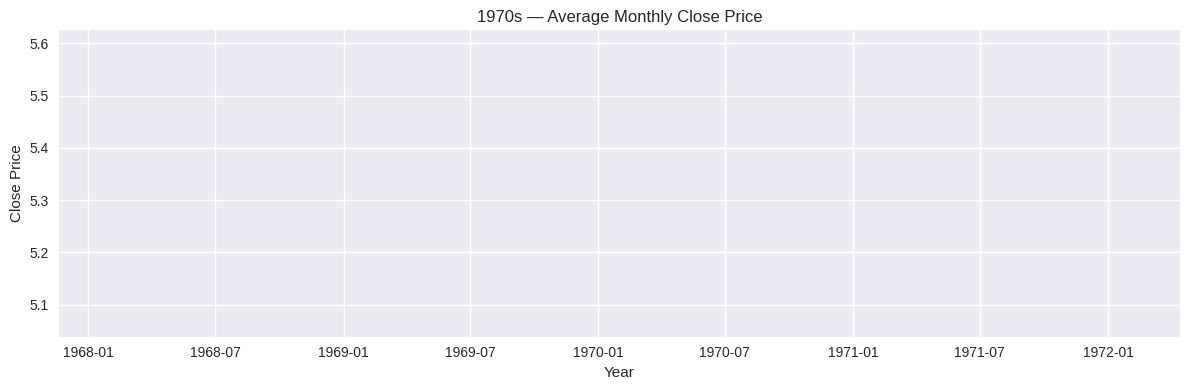

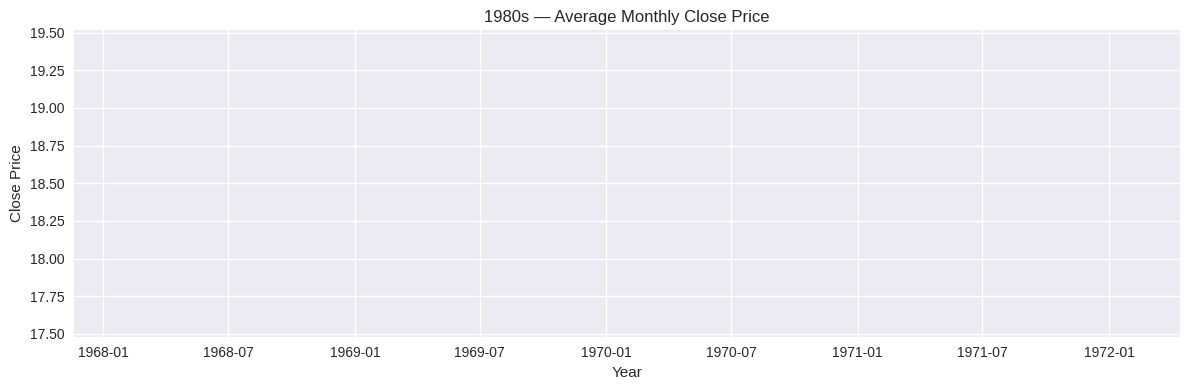

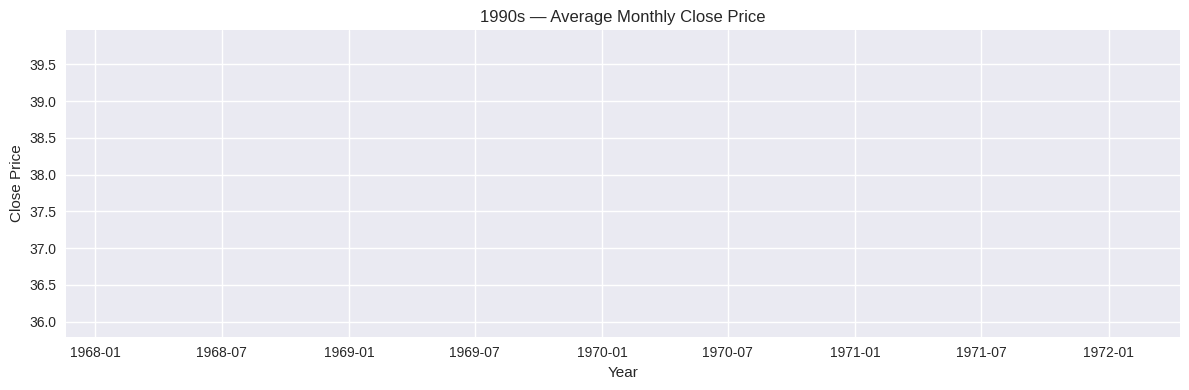

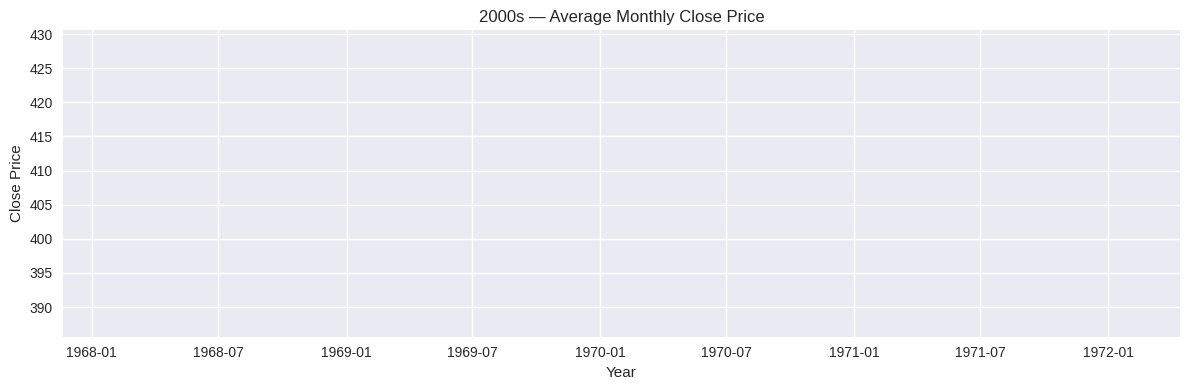

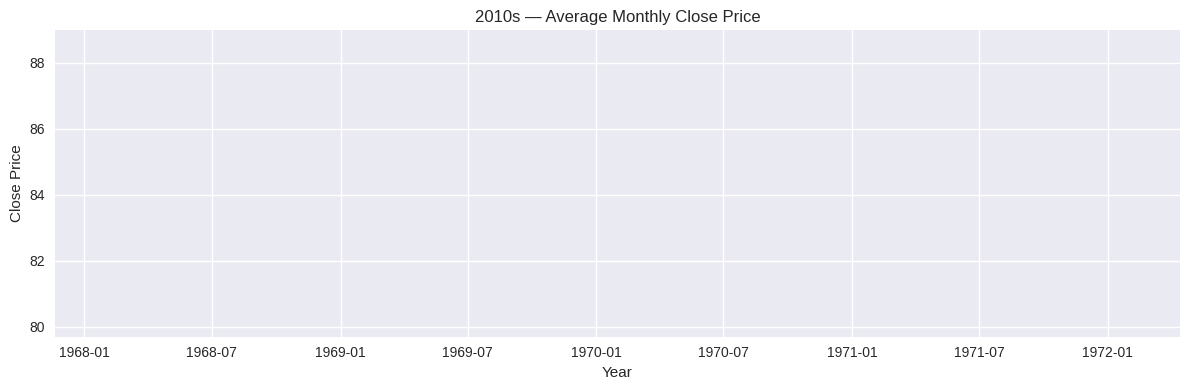

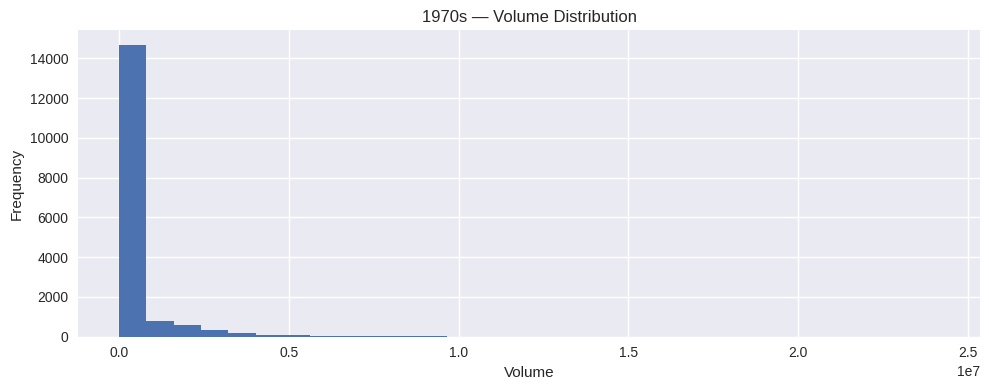

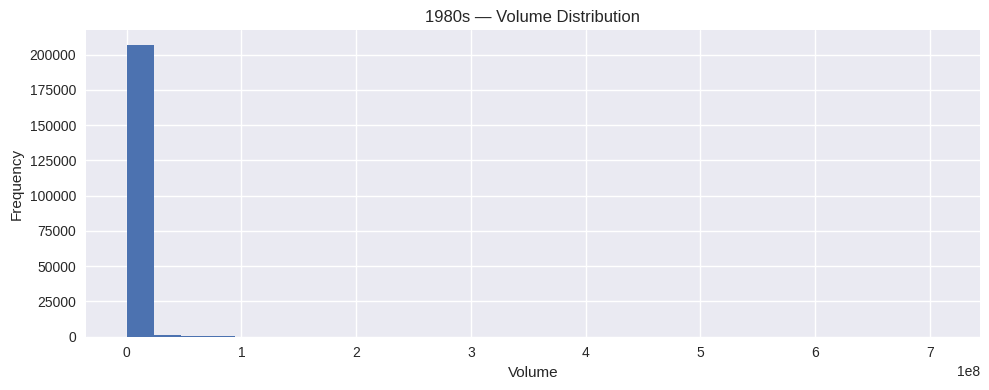

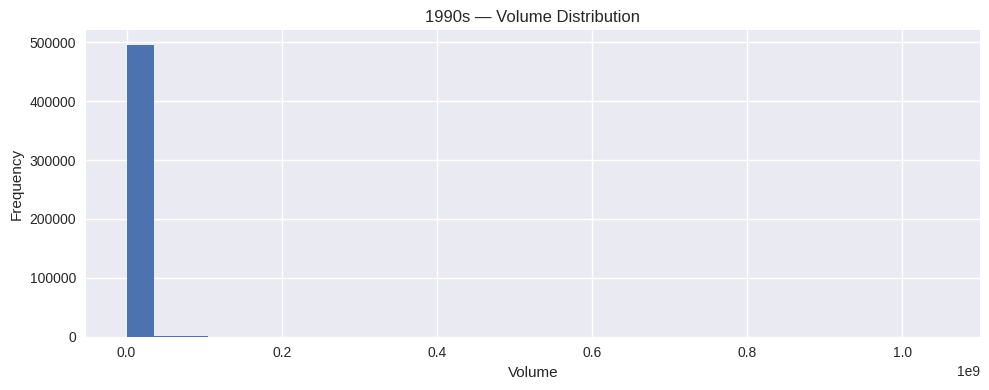

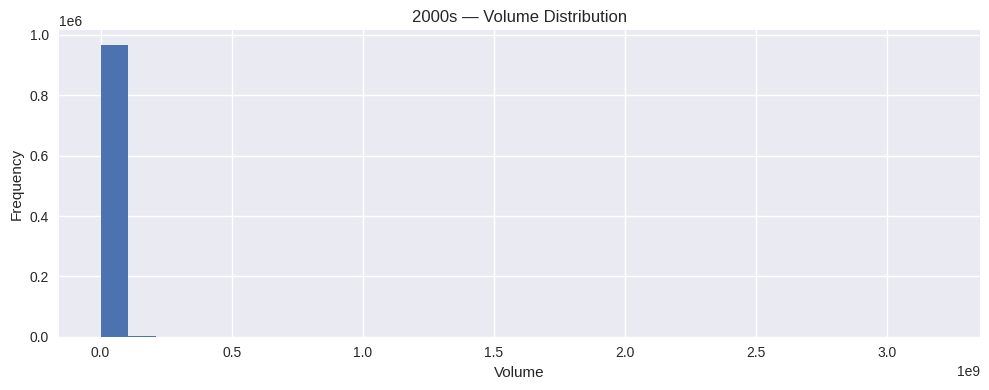

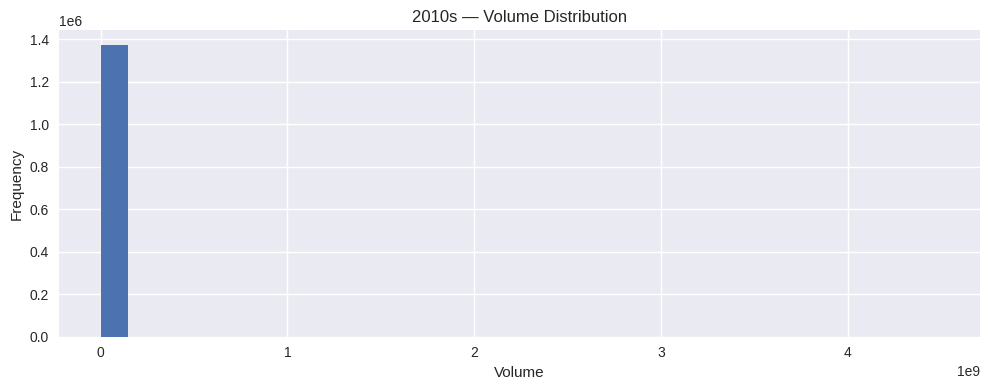

/tmp/ipython-input-2437063480.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["high"], df["low"]], labels=["High", "Low"])


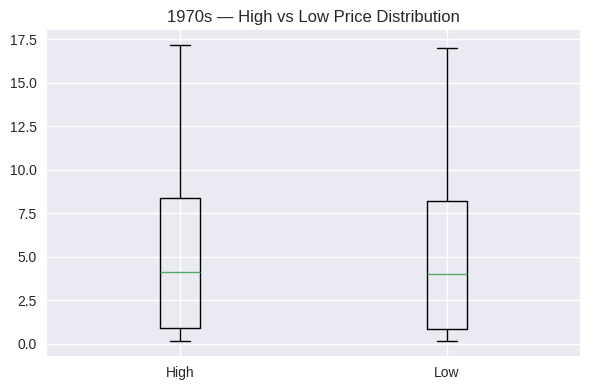

/tmp/ipython-input-2437063480.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["high"], df["low"]], labels=["High", "Low"])


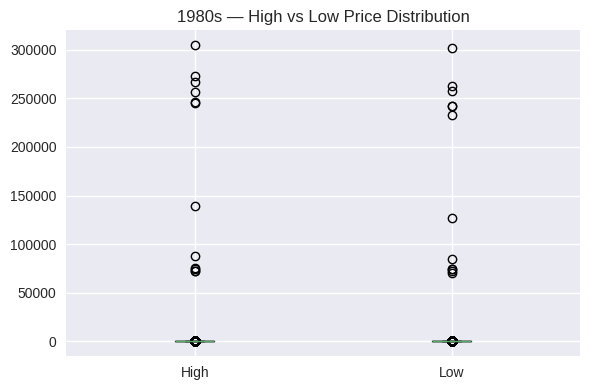

/tmp/ipython-input-2437063480.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["high"], df["low"]], labels=["High", "Low"])


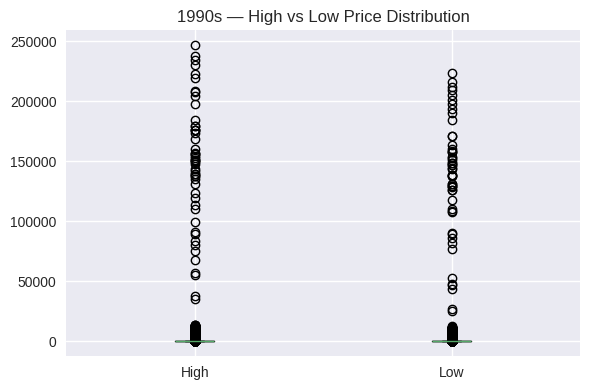

/tmp/ipython-input-2437063480.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["high"], df["low"]], labels=["High", "Low"])


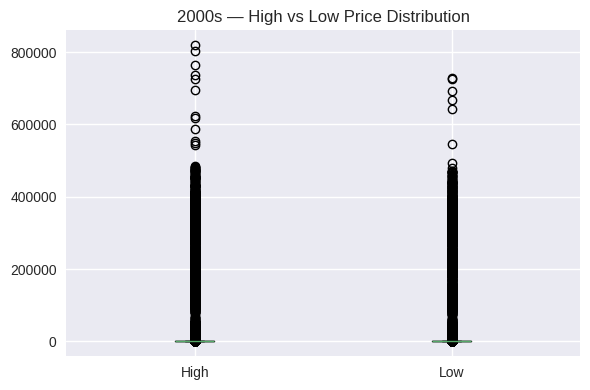

/tmp/ipython-input-2437063480.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["high"], df["low"]], labels=["High", "Low"])


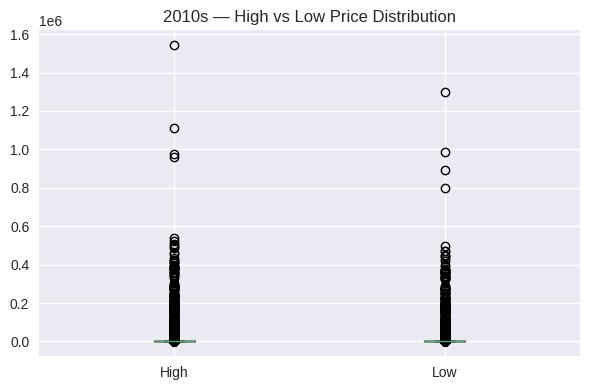

In [18]:
# ============================================================
# 9) VISUALIZATIONS
# ============================================================

# --- CREATE OUTPUT FOLDER ---

import os

os.makedirs("eda_outputs", exist_ok=True)


# ----------------------------
# A) Monthly Close Price Trend
# ----------------------------

for decade, df in decade_groups.items():

    df = df.copy()

    # Ensure datetime index
    df.index = pd.to_datetime(df.index, errors="coerce")

    # Resample using ME (month end)
    monthly = df["close"].resample("ME").mean()

    plt.figure(figsize=(12, 4))
    plt.plot(monthly)
    plt.title(f"{decade}s — Average Monthly Close Price")
    plt.xlabel("Year")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# ----------------------------
# B) Volume Histograms
# ----------------------------

for decade, df in decade_groups.items():

    plt.figure(figsize=(10, 4))
    plt.hist(df["volume"], bins=30)
    plt.title(f"{decade}s — Volume Distribution")
    plt.xlabel("Volume")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# ----------------------------
# C) Boxplots (High & Low)
# ----------------------------

for decade, df in decade_groups.items():

    plt.figure(figsize=(6, 4))
    plt.boxplot([df["high"], df["low"]], labels=["High", "Low"])
    plt.title(f"{decade}s — High vs Low Price Distribution")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [17]:
import os

# Ensure summary_stats exists
if "summary_stats" not in globals():
    summary_stats = {}
    for decade, df in decade_groups.items():
        summary_stats[decade] = df[["open", "high", "low", "close", "volume"]].describe()

# Create output folder
os.makedirs("eda_outputs", exist_ok=True)

# Save all summary CSVs
for decade, stats in summary_stats.items():
    stats.to_csv(f"eda_outputs/{decade}_summary_stats.csv")

print("✔ Summary statistics saved!")


✔ Summary statistics saved!
